# Evaluation of Linear Regression Model

### To evaluate a Linear Regression model, we have to look out for 2 concepts:
### 1. Goodness-of-Fit
         - how well the linear regression model fits the observed data.
         - They provide quantitative measures of the agreement or discrepancy between the predicted values and the actual values

### 2. Quality of a Linear Regression Model:
        - involves evaluating the model's assumptions, checking for violations, and assessing its overall performance and usefulness in the given context.
        - determines its reliability and suitability for making accurate predictions and drawing valid inferences.

#### Let's remake the model we made earlier

In [19]:
# import dependencies
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn import model_selection
from sklearn.linear_model import LinearRegression

In [3]:
path="https://raw.githubusercontent.com/krishnaik06/simple-Linear-Regression/master/Salary_Data.csv"

# using numpy
data=np.loadtxt(path,delimiter=",",skiprows=1)

In [4]:
x=data[:,0].reshape(-1,1) # YearsExperience
y=data[:,1] # Salary
print(x.shape,y.shape)

(30, 1) (30,)


In [5]:
# Let's do the test train split again
x_train,x_test,y_train,y_test = model_selection.train_test_split(x,y)

alg=LinearRegression()
alg.fit(x_train,y_train)

LinearRegression()

# Quality of Linear Regression

> Is using linear models even correct? or should we use other Machine Learning models which can give more accurate results and represent the relationship b/w features and labels in a far more accurate manner

Assessing the significance and interpretability of the regression coefficients, evaluating multicollinearity among predictors, and conducting residual analysis are also important aspects of model quality.

Here are four key points related to checking quality of linear regression:
1. Linearity
2. Homoscedasticity:
3. Independence of residuals
4. Normality of residuals

In [6]:
# create input data for prediction
X=np.linspace(1,10,30).reshape(-1,1)

# create predicted label data
y_pred=alg.predict(X)

# actual label data
y=y

# residuals
residuals=y-y_pred

### **Linearity:** Check if relationship b/w features(I/P) and label(O/P) is linear.
- ##### That is, expected value of label can be given by a line with constant slopes in each dimention(features) and some constant value
- ##### Done by examining scatter plot of predicted vs actual values of label. If the relationship appears to be approximately linear, it suggests that the linearity assumption is reasonable.  <br>

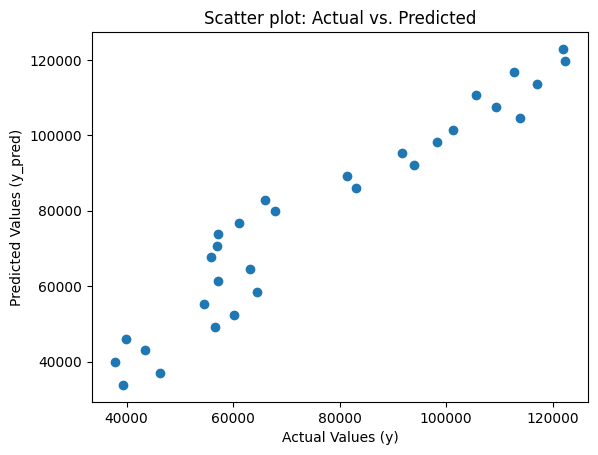

In [7]:
# so we need a scatterplot b/w actual label values "y" \
# and predicted label values "y_pred"

# Scatter plot between y and y_pred
plt.scatter(y, y_pred)
plt.xlabel('Actual Values (y)')
plt.ylabel('Predicted Values (y_pred)')
plt.title('Scatter plot: Actual vs. Predicted')
plt.show()

 The relationship appears to be almost linear, so we passed the linearity test

 ### Homoscedasticity refers to assumption of constant variability in residuals across all levels of the independent variables,
- ie variance of errors given any value of independent variable Xi should be constant instead of being a function of Xi (ie being dependent on what value of Xi currently is)
> As value of independent variable(feature) is increasing/decresing, the variance in error values at a point is increasing or decreasing as well, as if variance of errors at a given point is a function of feature itself, then Homoscedasticity is violated


There are two common types of  Residual Plots used for this purpose:
1.  Residual Plot 1 `(Residual vs Predicted Values Scatterplot)`: This plot displays the residuals (vertical axis) against the predicted values (horizontal axis).
- A scatter plot with no discernible pattern or trend indicates homoscedasticity. The spread of the residuals should be approximately constant across different levels of predicted values.

2. Residual Plot 2 `(Residuals vs. Independent Variables Scatterplot)`: In this plot, the residuals (vertical axis) are plotted against each independent variable (horizontal axis) separately.
- This helps to identify any patterns or relationships between the residuals and the independent variables.
- If the spread of the residuals appears consistent across different values of the independent variables, it suggests homoscedasticity.

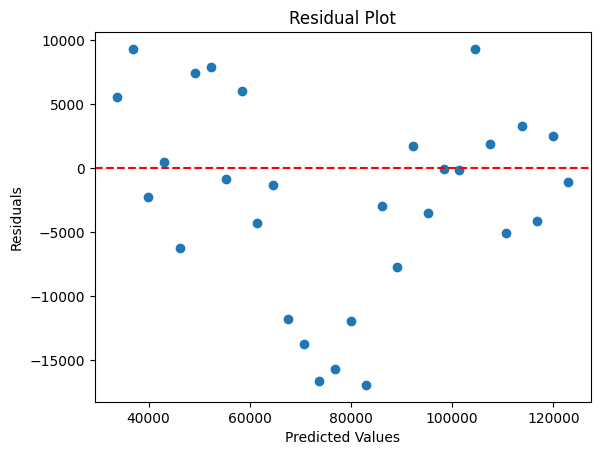

In [8]:
# Residual Plot

# Plotting the residuals against predicted values y_pred
# it is ok to plot them against x values too
# which we'll do below
# just don't plot them against y values tho
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

> remember that sum of residuals should add up to 0, hence **they have a mean of 0**, so we plot the y=zero line to see random scattering of points around it uniformly with constant variance

This doesn't look too good, there is a systematic curvature in the residuals which indicates that the linear relationship between y and x isn't a reasonable one.

But since the curvature is barely there, not much we can assume it's ok

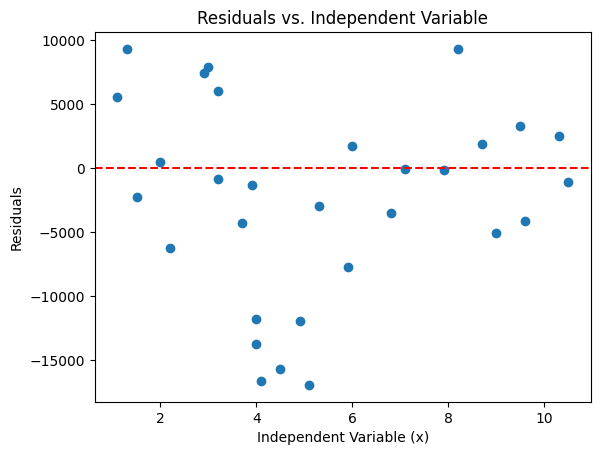

In [9]:
# Plot residuals against the independent variable

plt.scatter(x, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Independent Variable (x)')
plt.ylabel('Residuals')
plt.title('Residuals vs. Independent Variable')
plt.show()

as we can see, same problem here, getting doubts now, let's test further

## Independence of residuals:  the residual for one observation should not be related to the residuals of other observations.

> The residuals should be independent of each other, meaning that there should be no systematic patterns or correlations among them.

independence of residuals assumption is particularly relevant for time series analysis and spatial data analysis

- One way to check for independence is by examining the autocorrelation of the residuals using a correlogram or the Durbin-Watson test.

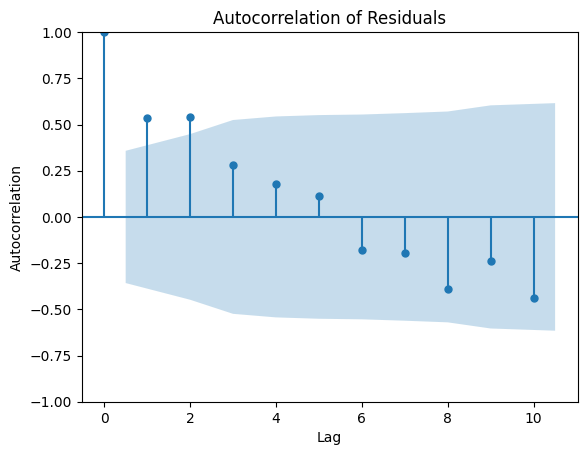

In [10]:
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf

# Plot the autocorrelation of residuals using a correlogram
plot_acf(residuals, lags=10)
# Specify the number of lags to include in the plot
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation of Residuals')
plt.show()

In [15]:
# "lags" refer to the number of time periods or intervals
# between observations that are used to calculate the correlation coefficients.
# Autocorrelation measures the relationship between an observation
# and its lagged values at different time intervals.

- If the autocorrelation coefficients are mostly within the significance bounds, it suggests little to no autocorrelation in the residuals.
  - This is desirable for linear regression models as it indicates that the residuals are independent and unrelated to their lagged values.

- If there are significant autocorrelation coefficients outside the bounds, it indicates the presence of autocorrelation.
  - Positive autocorrelation (coefficients > 0) suggests that high residuals are followed by high residuals, and low residuals are followed by low residuals (and vice versa).
  - Negative autocorrelation (coefficients < 0) suggests an inverse relationship.

- The pattern and decay of autocorrelation coefficients across different lags can provide insights into the underlying dynamics and potential issues with the model.
> For example, a "fan shape" pattern with gradually decreasing autocorrelation suggests that the model may not capture all the relevant information or there are time-dependent patterns not accounted for.

In [14]:
from statsmodels.stats.stattools import durbin_watson

# Compute and print the Durbin-Watson statistic

durbin_watson_statistic = durbin_watson(residuals)
print("Durbin-Watson Statistic:", durbin_watson_statistic)

Durbin-Watson Statistic: 0.8147099390290059


> The Durbin-Watson statistic is a test statistic that measures the presence of autocorrelation in the residuals of a regression model. It has a value between 0 and 4, where:

> - A value around 2 suggests no significant autocorrelation.
- A value closer to 0 indicates positive autocorrelation (residuals are positively correlated with each other).
- A value closer to 4 indicates negative autocorrelation (residuals are negatively correlated with each other).


we got 0.80 which indicates a moderate level of positive autocorrelation.Ideally, for a well-fitted regression model, you would want the Durbin-Watson statistic to be around 2, indicating no significant autocorrelation.

## Normality of residuals:
The residuals should follow a normal distribution. This assumption is important for hypothesis testing and constructing confidence intervals.

- Normality can be assessed by
    1. *Histogram of residuals*: which  should resemble a symmetric bell-shaped curve, indicating a normal distribution.
        - If the histogram deviates from the normal distribution, it may suggest non-normality in the residuals.

    2. *Q-Q plot of the residuals*: compares the observed quantiles of the residuals against the expected quantiles of a theoretical normal distribution.
        - If the points on the plot approximately fall along a straight line, it suggests that the residuals follow a normal distribution. Any deviations from the straight line indicate departures from normality.

    3. *Statistical Tests*: Perform statistical tests to formally assess the normality of residuals. Common tests include the Shapiro-Wilk test, Anderson-Darling test, and Kolmogorov-Smirnov test.
        - These tests generate a p-value that indicates the likelihood of the residuals being normally distributed
        - A significant p-value (typically below a predetermined significance level, e.g., 0.05) suggests a departure from normality.

    4. *Skewness and Kurtosis*: Calculate the skewness and kurtosis of the residuals.
       > Skewness measures the asymmetry of the distribution, and kurtosis measures the peakedness or flatness.

      -  In a normal distribution, skewness should be close to zero, and kurtosis should be close to the expected value of 3.


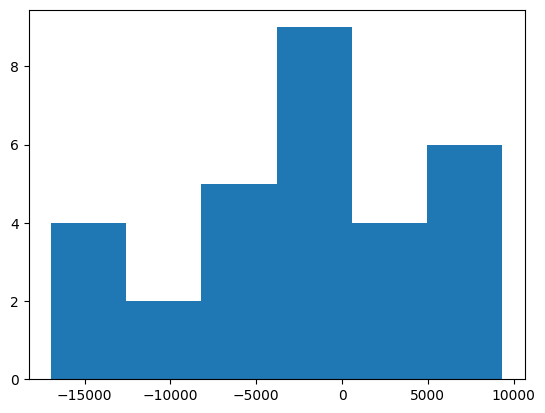

In [16]:
# Histogram of Residuals
plt.hist(residuals,bins=6)
plt.show()

looks normally distributed, ok check

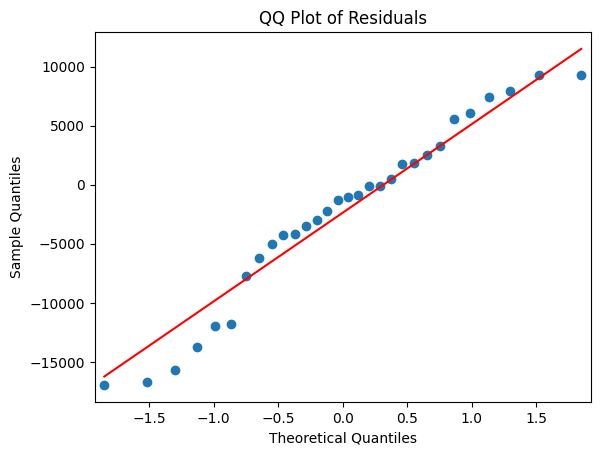

In [17]:
# QQ plot of residuals
sm.qqplot(residuals, line='s')
plt.title('QQ Plot of Residuals')
plt.show()

as we can see, QQ Plot follows a straight line, this is good, check
> when the points on a Q-Q plot fall approximately along a straight line, it indicates that the observed data is likely to follow a normal distribution.

In [20]:
# Shapiro-Wilk test for normality
_, p_value = stats.shapiro(residuals)
print("Shapiro-Wilk Test p-value:", p_value)

Shapiro-Wilk Test p-value: 0.17487841844558716


0.17>0.05, hence our assumption of normality stands true

The Shapiro-Wilk test produces a p-value, which is used to interpret the results. The p-value represents the probability of obtaining the observed data if the null hypothesis of normality is true.

- **If p-value > significance level(0.05):** we fail to reject the null hypothesis. This suggests that the data is consistent with being drawn from a normal distribution. In other words, there is not enough evidence to conclude that the data significantly deviates from normality.

- **If p-value < significance level:** we reject the null hypothesis. This indicates that the data significantly departs from a normal distribution. In other words, there is evidence to suggest that the data does not follow a normal distribution.

> It's important to note that the Shapiro-Wilk test is more powerful than other normality tests, especially for small sample sizes. However, it is not infallible, and the test's performance can be influenced by various factors such as sample size and the presence of outliers.



In [22]:
# Skewness and Kurtosis of residuals
skewness = stats.skew(residuals)
kurtosis = stats.kurtosis(residuals)
print("Skewness:", skewness)
print("Kurtosis:", kurtosis)

# This is not a good test as compared to the ones above

Skewness: -0.3986081881421575
Kurtosis: -0.6616066285146012


### Skewness and Kurtosis

#### Skewness: Skewness measures the asymmetry of the distribution.
- A skewness value of 0 indicates a perfectly symmetrical distribution.

- Positive skewness (> 0) indicates a right-skewed distribution, where the tail is longer on the right side and the majority of the data is concentrated on the left side.

- Negative skewness (< 0) indicates a left-skewed distribution, where the tail is longer on the left side and the majority of the data is concentrated on the right side.

> The magnitude of skewness indicates the degree of asymmetry. The further the skewness value is from 0, the more pronounced the skewness.


#### Kurtosis: Kurtosis measures the peakedness or flatness of the distribution.
- A kurtosis value of 3 corresponds to the kurtosis of a normal distribution (referred to as mesokurtic).
- Positive kurtosis (> 3) indicates a distribution with a more peaked shape (leptokurtic) compared to a normal distribution. The tails are heavier, indicating more extreme values.
- Negative kurtosis (< 3) indicates a distribution with a flatter shape (platykurtic) compared to a normal distribution. The tails are lighter, indicating fewer extreme values.

> The magnitude of kurtosis represents the extent of the deviation from the normal distribution.
When examining the skewness and kurtosis of residuals in a linear regression model:

**Note that:**
- A skewness value close to 0 suggests that the residuals are approximately symmetrically distributed.
  - Positive or negative skewness indicates a departure from symmetry, with the direction indicating the longer tail.
- A kurtosis value of 3 indicates that the residuals follow a normal distribution.
  - Values higher than 3 (positive kurtosis) indicate a more peaked and heavier-tailed distribution.
  - Values lower than 3 (negative kurtosis) indicate a flatter and lighter-tailed distribution.

It's important to note that the interpretation of skewness and kurtosis values depends on the specific context and the characteristics of the data being analyzed.

Additionally, these measures provide insights into the shape of the distribution but do not necessarily indicate the presence or absence of any specific problem in the regression model.

Therefore, it's crucial to consider them alongside other diagnostic tools and statistical tests to comprehensively evaluate the model's performance and assumptions.

# Goodness-of-Fit

> These measures evaluate the accuracy and precision of the model's predictions, indicating how well the model captures the variability in the dependent variable.



Examples of goodness-of-fit measures include
- Mean Squared Error (MSE) or Root MSE (RMSE)
- R-Squared (R2)
- Mean Absolute Arror (MAE)
- Explained Variance Score (EVS).

In [13]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, explained_variance_score

# Mean Squared Error (MSE)
mse = mean_squared_error(y, y_pred)

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# R-squared (R2)
r2 = r2_score(y, y_pred)

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y, y_pred)

# Explained Variance Score (EVS)
evs = explained_variance_score(y, y_pred)

# Print the results
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)
print("Mean Absolute Error (MAE):", mae)
print("Explained Variance Score (EVS):", evs)

Mean Squared Error (MSE): 61904629.02010965
Root Mean Squared Error (RMSE): 7867.949480017627
R-squared (R2): 0.9147905135203948
Mean Absolute Error (MAE): 6066.514701248263
Explained Variance Score (EVS): 0.9225117562920078


The key takeaway from these evaluation metrics is to assess the performance and quality of your linear regression model.


- Lower values of MSE, RMSE, and MAE indicate smaller prediction errors, indicating a better fit.

- Higher R-squared and EVS values indicate a higher proportion of variance explained by the model, suggesting a better model performance.


These values indicate our model performed ok, EVS is calculated between 0 and 1,  the EVS value of 0.9225117562920078 suggests that approximately 92.25% of the variance in the dependent variable is explained by the model.  the R-squared value of 0.9147905135203948 suggests that approximately 91.48% of the variance in the dependent variable is explained by the independent variables in the linear regression model. This is generally considered a good fit, so this is ok performance

